In [44]:
from keras.models import load_model
from SiameseModel import SiameseModel
from SiameseLoader import SiameseLoader
import glob
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
import random
import matplotlib.pyplot as plt


# Load data set

In [2]:
loader = SiameseLoader('./data')

loading snake breed: 152
loading snake breed: 159
loading snake breed: 80
loading snake breed: 187
loading snake breed: 3
loading snake breed: 46


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


loading snake breed: 158
loading snake breed: 87
loading snake breed: 123
loading snake breed: 100
loading snake breed: 205
loading snake breed: 197
loading snake breed: 120
loading snake breed: 61
loading snake breed: 124
loading snake breed: 67
loading snake breed: 110
loading snake breed: 44
loading snake breed: 203
loading snake breed: 32
loading snake breed: 43
loading snake breed: 111
loading snake breed: 219
loading snake breed: 156
loading snake breed: 175
loading snake breed: 193
loading snake breed: 201
loading snake breed: 88
loading snake breed: 83
loading snake breed: 109
loading snake breed: 107
loading snake breed: 185
loading snake breed: 89
loading snake breed: 206
loading snake breed: 165
loading snake breed: 127
loading snake breed: 15
loading snake breed: 230
loading snake breed: 204
loading snake breed: 21
loading snake breed: 66
loading snake breed: 167
loading snake breed: 63
loading snake breed: 128
loading snake breed: 45
loading snake breed: 69
loading snake b

# Load siamese network

In [3]:
ckpts = glob.glob("checkpoints/*.hdf5")
latest_ckpt = max(ckpts, key=os.path.getctime)
print("loading from checkpoint: ", latest_ckpt)
initial_epoch = int(latest_ckpt[latest_ckpt.find("-epoch-") + len("-epoch-"):latest_ckpt.rfind("-lr-")])
model = load_model(latest_ckpt)

loading from checkpoint:  checkpoints/flowchroma-epoch-00310-lr--train_loss-0.5502-val_loss-0.5882.hdf5


/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py:1271: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


# Accuracy function 

In [4]:
def find_accuracy(df):
    correct =  df.loc[df['predictions'] == df['targets']].shape[0]
    incorrect = df.loc[df['predictions'] != df['targets']].shape[0]
    total = df.shape[0]
    print('Accuracy : {}%'.format(100*correct/total))
    return correct, incorrect, total
    

# Test on validation set (Test 1)

In [18]:
pairs, targets = loader.get_validation_batch(84)
prediction = model.predict(pairs)

#data post processing
df = pd.DataFrame(data={'predictions':prediction.reshape(prediction.shape[0]), 'targets':targets.reshape(targets.shape[0])})
df.loc[df['predictions'] >= 0.5, 'predictions'] = 1
df.loc[df['predictions'] < 0.5, 'predictions'] = 0
find_accuracy(df)


Accuracy : 63.095238095238095%


(53, 31, 84)

# Test for real classification of image (Test 2)

In [19]:
pairs, targets = loader.make_oneshot_task(2)
prediction = model.predict(pairs)
df = pd.DataFrame(data={'predictions':prediction.reshape(prediction.shape[0]), 'targets':targets.reshape(targets.shape[0])})
df.loc[df['predictions'] >= 0.5, 'predictions'] = 1
df.loc[df['predictions'] < 0.5, 'predictions'] = 0
find_accuracy(df)

Accuracy : 61.904761904761905%


(52, 32, 84)

In [26]:
total = 0
correct = 0 
for test_id in range(84):
    print("Test id: {}".format(test_id))
    pairs, targets = loader.make_oneshot_task(test_case_id=test_id)
    prediction = model.predict(pairs)
    df = pd.DataFrame(data={'predictions':prediction.reshape(prediction.shape[0]), 'targets':targets.reshape(targets.shape[0])})
    df.loc[df['predictions'] >= 0.5, 'predictions'] = 1
    df.loc[df['predictions'] < 0.5, 'predictions'] = 0
    c,i,t = find_accuracy(df)
    total+=t
    correct+=c
print('Final accuracy : {}'.format(correct*100/total))    

Test id: 0
Accuracy : 66.66666666666667%
Test id: 1
Accuracy : 61.904761904761905%
Test id: 2
Accuracy : 61.904761904761905%
Test id: 3
Accuracy : 64.28571428571429%
Test id: 4
Accuracy : 61.904761904761905%
Test id: 5
Accuracy : 59.523809523809526%
Test id: 6
Accuracy : 66.66666666666667%
Test id: 7
Accuracy : 54.76190476190476%
Test id: 8
Accuracy : 63.095238095238095%
Test id: 9
Accuracy : 60.714285714285715%
Test id: 10
Accuracy : 61.904761904761905%
Test id: 11
Accuracy : 71.42857142857143%
Test id: 12
Accuracy : 63.095238095238095%
Test id: 13
Accuracy : 76.19047619047619%
Test id: 14
Accuracy : 33.333333333333336%
Test id: 15
Accuracy : 53.57142857142857%
Test id: 16
Accuracy : 61.904761904761905%
Test id: 17
Accuracy : 67.85714285714286%
Test id: 18
Accuracy : 64.28571428571429%
Test id: 19
Accuracy : 61.904761904761905%
Test id: 20
Accuracy : 48.80952380952381%
Test id: 21
Accuracy : 66.66666666666667%
Test id: 22
Accuracy : 77.38095238095238%
Test id: 23
Accuracy : 60.7142857

# Individual image test

In [20]:
loader.test_oneshot(model, 100)

Got an average of 5.0% one-shot learning accuracy


5.0

# Pair wise comparison user test

In [111]:
sample_size = 20
pairs, targets = loader.get_validation_batch(sample_size)

In [112]:
pairs, targets = loader.get_validation_batch(sample_size)

In [113]:
prediction = model.predict(pairs)
df = pd.DataFrame(data={'predictions':prediction.reshape(prediction.shape[0]), 'targets':targets.reshape(targets.shape[0])})
df.loc[df['predictions'] >= 0.5, 'predictions'] = 1
df.loc[df['predictions'] < 0.5, 'predictions'] = 0
find_accuracy(df)

Accuracy : 60.0%


(12, 8, 20)

In [114]:
def draw_image_side_by_side(img1, img2):
    fig, axarr = plt.subplots(1,2)
    axarr[0].imshow(img1)
    axarr[1].imshow(img2)
    plt.show()

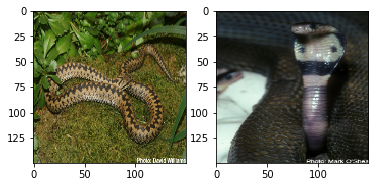

Select 1 or 0
0
Correct.
1
1
Accuracy 100.0%


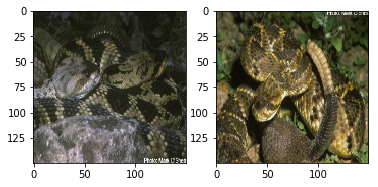

Select 1 or 0
1
Correct.
2
2
Accuracy 100.0%


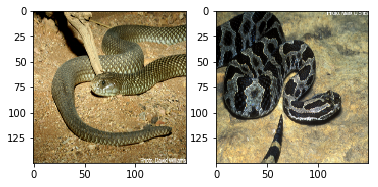

Select 1 or 0
0
Correct.
3
3
Accuracy 100.0%


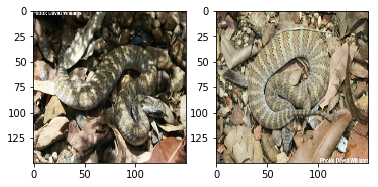

Select 1 or 0
1
Correct.
4
4
Accuracy 100.0%


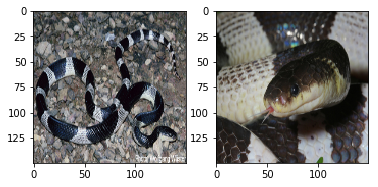

Select 1 or 0
1
Correct.
5
5
Accuracy 100.0%


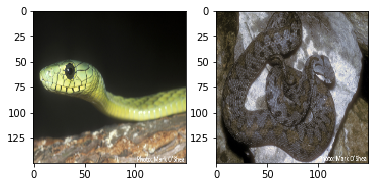

Select 1 or 0
0
Correct.
6
6
Accuracy 100.0%


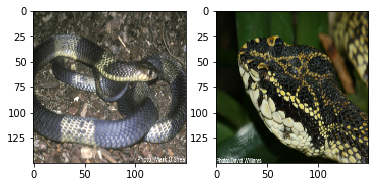

Select 1 or 0
1
Incorrect
6
7
Accuracy 85.71428571428571%


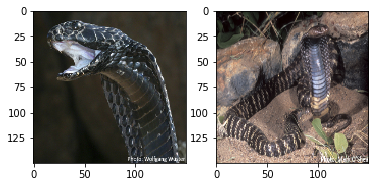

Select 1 or 0
1
Correct.
7
8
Accuracy 87.5%


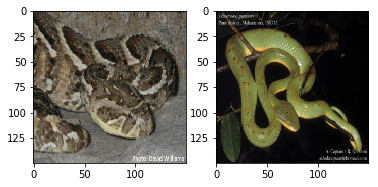

Select 1 or 0
0
Correct.
8
9
Accuracy 88.88888888888889%


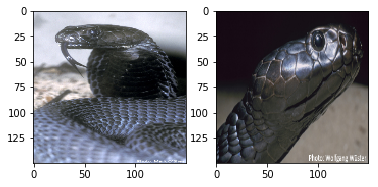

Select 1 or 0
1
Correct.
9
10
Accuracy 90.0%


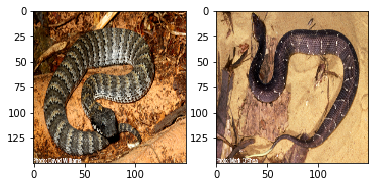

Select 1 or 0
0
Correct.
10
11
Accuracy 90.9090909090909%


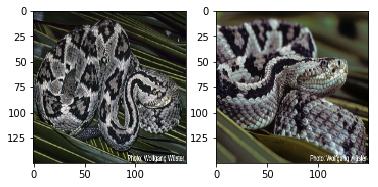

Select 1 or 0
1
Correct.
11
12
Accuracy 91.66666666666667%


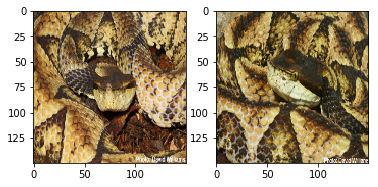

Select 1 or 0
1
Correct.
12
13
Accuracy 92.3076923076923%


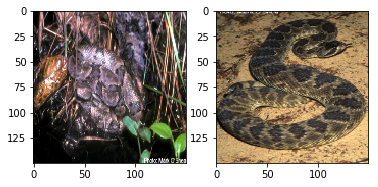

Select 1 or 0
1
Incorrect
12
14
Accuracy 85.71428571428571%


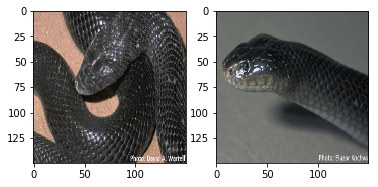

Select 1 or 0
1
Correct.
13
15
Accuracy 86.66666666666667%


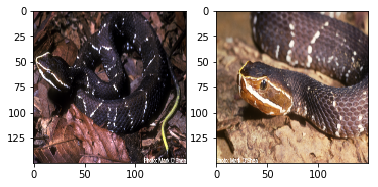

Select 1 or 0
1
Correct.
14
16
Accuracy 87.5%


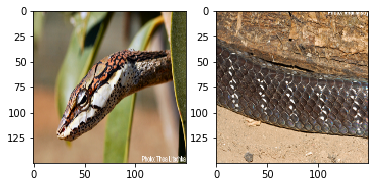

Select 1 or 0
0
Correct.
15
17
Accuracy 88.23529411764706%


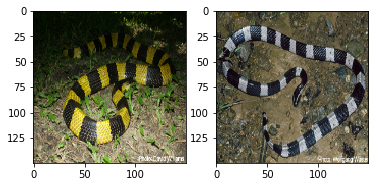

Select 1 or 0
1
Correct.
16
18
Accuracy 88.88888888888889%


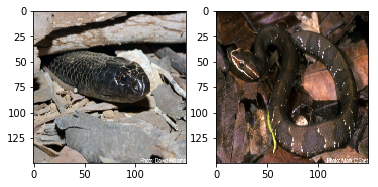

Select 1 or 0
1
Incorrect
16
19
Accuracy 84.21052631578948%


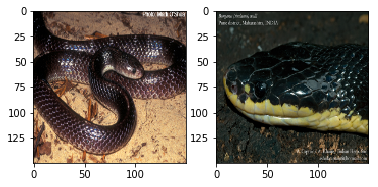

Select 1 or 0
0
Correct.
17
20
Accuracy 85.0%
Final Accuracy: 0.85


In [115]:
ncorrect = 0
ntotal = 0
for i in random.sample(range(0, sample_size), sample_size):
    draw_image_side_by_side(pairs[0][i],pairs[1][i])
    target = targets[i]
    a = -1
    while (a!=0 and a!=1):
        print('Select 1 or 0')
        a = int(input())
    ntotal+=1
    if (target == a):
        ncorrect+=1
        print('Correct.')
    else:
        print('Incorrect')
    print(ncorrect)
    print(ntotal)
    print('Accuracy {}%'.format(ncorrect*100/ntotal))
print('Final Accuracy: {}'.format(ncorrect/ntotal))   